In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df.shape

(150, 4)

In [28]:
# Adding a new column to the dataframe with 5 features and 1 target
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [30]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [31]:
df0 = df[:50]
df1 = df[50:100]
df2 =df[100:]

In [33]:
import matplotlib.pyplot as plt

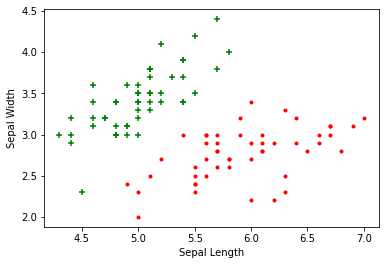

In [36]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color = "green", marker = "+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color = "red", marker = ".")

### Train_Test_Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop(["target"], axis = "columns")
y = df.target

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 1)
print("Train Set: ", X_train.shape, X_test.shape)
print("Test Set: ", y_train.shape, y_test.shape)

Train Set:  (120, 4) (30, 4)
Test Set:  (120,) (30,)


## K nearest neighbor (KNN)
#### Import library

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [49]:
# It is accurate because it got all the predictions right.
neigh.score(X_test,y_test)

1.0

## Predicting
We can use the model to make predictions on the test set:

In [45]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 2])

# Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [46]:
from sklearn import metrics

In [47]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9583333333333334
Test set Accuracy:  1.0


### We can calculate the accuracy of KNN for different values of k.

In [50]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.96666667, 1.        , 0.96666667])

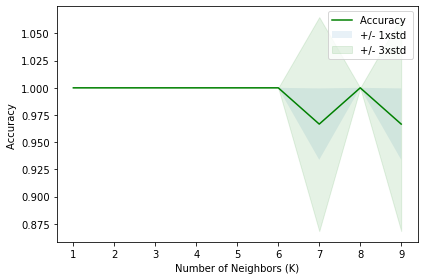

In [51]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,yhat)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'True')

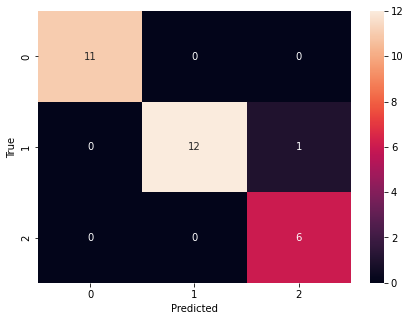

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")

So only one time our model made the wrong prediction.

# Classification report

In [54]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

